# Marking (Marker)

**Total Marks:**   90/100

* **Task 1**:   *Implementing a sigmoid layer* - 10/15

Correctness (checksums OK) Y

*Comments:*   

1. (mandatory)linear transformation in both fprop and bprop components are re-used (N)
2. (mandatory) cost_bprop for Sigmoid layer is overriden and made raise NotImplementedError() exception. Otherwise implementation of Linear would be (sliently) used, which in general case is incorrect. (N)
3. (optional) pgrads is reimplemented, using Linear one (N)
4. (optional) numerical stabilisation is present (N).


* **Task 2**:  *Implementing a softmax layer* - 10/15

Correctness (checksums OK) Y

 

*Comments (similar to Sigmoid)*

1. (mandatory) linear transformation in both fprop and bprop components are re-used (N)
2. (mandatory) cost_bprop for Sigmoid layer is overriden and raises NotImplementedError() exception. Otherwise implementation of Linear would be (sliently) used, which in general case is incorrect. (N)
3. (optional) pgrads is reimplement, re-using Linear one (N)
4. (optional) numerical stabilisation is present. (N)


* **Task 3**:  *Constructing a multi-layer network* - 40/40

a) 100 hidden unit network   20/20

Correct implementation Y

Experimental results Y


b)  different learning rates   10/10

Correct implementation Y

Experimental results Y

Notes:

1. (note) Error rate, not accuracy (1 - error rate) is used (Y)
2. (mandatory) Accuracies are in 90%-100% (Y)
 


c) Hinton diagrams  10/10

100 hidden unit receptive fields Y

hinton diagrams for classes 0, 1  Y


* **Task 4**:  *Experiments with different architectures*  - 30/30

Experimental results as instructed Y

Graphs as instructed Y

Any further experiments? (not for credit) N

Notes:

1. Number of parametres is computed correctly, good! Correct numbers are approx. 493, 399, 346 and 311 hidden units per layer, respectively.
2. (minor) Error rates printed instead of log-likelihood (cost function/error function).




# Coursework #1

## Introduction

This coursework is concerned with building multi-layer networks to address the MNIST digit classification problem. It builds on the previous labs, in particular [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) in which single layer networks were trained for MNIST digit classification.   The course will involve extending that code to use Sigmoid and Softmax layers, combining these into multi-layer networks, and carrying out a number of MNIST digit classification experiments, to investigate the effect of learning rate, the number of hidden units, and the number of hidden layers.

The coursework is divided into 4 tasks:
* **Task 1**:   *Implementing a sigmoid layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Sigmoid`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 2**:  *Implementing a softmax layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Softmax`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 3**:  *Constructing a multi-layer network* - 40 marks.  
This task involves putting together a Sigmoid and a Softmax layer to create a multi-layer network, with one hidden layer (100 units) and one output layer, that is trained to classify MNIST digits.  This task will include reporting classification results, exploring the effect of learning rates, and plotting Hinton Diagrams for the hidden units and output units.
* **Task 4**:  *Experiments with different architectures*  - 30 marks.  
This task involves further MNIST classification experiments, primarily looking at the effect of using different numbers of hidden layers.
The coursework will be marked out of 100, and will contribute 30% of the total mark in the MLP course.

## Previous Tutorials

Before starting this coursework make sure that you have completed the first three labs:

* [00_Introduction.ipynb](00_Introduction.ipynb) - setting up your environment; *Solutions*: [00_Introduction_solution.ipynb](00_Introduction_solution.ipynb)
* [01_Linear_Models.ipynb](01_Linear_Models.ipynb) - training single layer networks; *Solutions*: [01_Linear_Models_solution.ipynb](01_Linear_Models_solution.ipynb)
* [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) - training a single layer network for MNIST digit classification

To ensure that your virtual environment is correct, please see [this note](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/kernel_issue_fix.md) on the GitHub.
## Submission
**Submission Deadline:  Thursday 29 October, 16:00** 

Submit the coursework as an ipython notebook file, using the `submit` command in the terminal on a DICE machine. If your file is `03_MLP_Coursework1.ipynb` then you would enter:

`submit mlp 1 03_MLP_Coursework1.ipynb` 

where `mlp 1` indicates this is the first coursework of MLP.

After submitting, you should receive an email of acknowledgment from the system confirming that your submission has been received successfully. Keep the email as evidence of your coursework submission.

**Please make sure you submit a single `ipynb` file (and nothing else)!**

**Submission Deadline:  Thursday 29 October, 16:00** 



## Getting Started
Please enter your exam number and the date in the next code cell.

In [101]:
#MLP Coursework 1
#Exam number: B076165
#Date: <28.10.2015>


Please run the next code cell, which imports `numpy` and seeds the random number generator.  Please **do not** modify the random number generator seed!

In [1]:
import numpy

#Seed a random number generator running the below cell, but do **not** modify the seed.
rng = numpy.random.RandomState([2015,10,10])
rng_state = rng.get_state()

## Task 1 - Sigmoid Layer (15%)

In this task you need to create a class `Sigmoid` which encapsulates a layer of sigmoid units.  You should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`), which implements a a layer of linear units (i.e. weighted sum plus bias).  The `Sigmoid` class extends this by applying the sigmoid transfer function to the weighted sum in the forward propagation, and applying the derivative of the sigmoid in the gradient descent back propagation and computing the gradients with respect to layer's parameters. Do **not** copy the implementation provided in `Linear` class but rather, **reuse** it through inheritance.

When you have implemented `Sigmoid` (in the `mlp.layers` module), then please test it by running the below code cell.


In [2]:
from mlp.layers import Sigmoid

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49, 20, 20])

rng.set_state(rng_state)
sigm = Sigmoid(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = sigm.fprop(a)
deltas, ograds  = sigm.bprop(h=fp, igrads=b)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds


4.21941537867
25.9255147706
4.1105500626
[ 0.067  0.728  0.999  0.512  0.159  0.584  0.238  0.932]
[ -1.263e+00   1.037e+01   0.000e+00   1.249e-02   6.678e-03   1.191e+01
   3.628e+00   1.268e+00]
[ 1.406  0.078 -0.268  0.418  1.646  0.831]


***
To include the `Sigmoid` code in the notebook please run the below code cell.  (The `%load` notebook command is used to load the source of the `Sigmoid` class from `mlp/layers.py`.)

In [ ]:
# %load -s Sigmoid mlp/layers.py
class Sigmoid(Linear):

    def __init__(self, idim, odim, rng=None, irange=0.1):

        super(Sigmoid, self).__init__(idim, odim, rng=rng, irange=irange)

    def fprop(self, inputs):
        """
        Implements a forward propagation through the i-th layer, that is
        some form of:
           a^i = xW^i + b^i
           h^i = f^i(a^i)
        with f^i, W^i, b^i denoting a non-linearity, weight matrix and
        biases of this (i-th) layer, respectively and x denoting inputs.

        :param inputs: matrix of features (x) or the output of the previous layer h^{i-1}
        :return: h^i, matrix of transformed by layer features
        """
        a = numpy.dot(inputs, self.W) + self.b
        """
        #for debugging
        try:
            h = 1.0 / (1.0 + numpy.exp(-a))
        except FloatingPointError:
            numpy.seterr(all='ignore') 
            h = 1.0 / (1.0 + numpy.exp(-a))
            print "sigmoid frop - h ~= 1"
            numpy.seterr(all='raise') 
        """
        h = 1.0 / (1.0 + numpy.exp(-a))
        # same as code here http://neuralnetworksanddeeplearning.com/chap1.html
        return h

    def bprop(self, h, igrads):
        """
        Implements a backward propagation through the layer, that is, given
        h^i denotes the output of the layer and x^i the input, we compute:
        dh^i/dx^i which by chain rule is dh^i/da^i da^i/dx^i
        x^i could be either features (x) or the output of the lower layer h^{i-1}
        :param h: it's an activation produced in forward pass
        :param igrads, error signal (or gradient) flowing to the layer, note,
               this in general case does not corresponds to 'deltas' used to update
               the layer's parameters, to get deltas ones need to multiply it with
               the dh^i/da^i derivative
        :return: a tuple (deltas, ograds) where:
               deltas = igrads * dh^i/da^i
               ograds = deltas \times da^i/dx^i
        """
        delta = igrads * h * (1.0 - h)
        ograds = numpy.dot(delta, self.W.T)
        return delta, ograds

    def bprop_cost(self, h, igrads, cost):
        """
        Implements a backward propagation in case the layer directly
        deals with the optimised cost (i.e. the top layer)
        By default, method should implement a back-prop for default cost, that is
        the one that is natural to the layer's output, i.e.:
        linear -> mse, softmax -> cross-entropy, sigmoid -> binary cross-entropy
        :param h: it's an activation produced in forward pass
        :param igrads, error signal (or gradient) flowing to the layer, note,
               this in general case does not corresponds to 'deltas' used to update
               the layer's parameters, to get deltas ones need to multiply it with
               the dh^i/da^i derivative
        :return: a tuple (deltas, ograds) where:
               deltas = igrads * dh^i/da^i
               ograds = deltas \times da^i/dx^i
        """
        #assume cross entropy error function
        ograds = numpy.dot(igrads, self.W.T)
        return igrads, ograds

    def get_name(self):
        return 'sigmoid'


## Task 2 - Softmax (15%)

In this task you need to create a class `Softmax` which encapsulates a layer of softmax units.  As in the previous task, you should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`).

When you have implemented `Softmax` (in the `mlp.layers` module), then please test it by running the below code cell.


In [4]:
from mlp.layers import Softmax

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([0, 0, 0, 0, 0, 0, 0, 1])

rng.set_state(rng_state)
softmax = Softmax(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = softmax.fprop(a)
deltas, ograds = softmax.bprop_cost(h=None, igrads=fp-b, cost=None)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds


1.0
0.0
0.0744177068753
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04   8.671e-03]
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04  -9.913e-01]
[-0.089  0.03   0.079  0.011  0.017  0.027]


***
To include the `Softmax` code in the notebook please run the below code cell.  (The notebook `%load` command is used to load the source of the `Softmax` class from `mlp/layers.py`.)

In [ ]:
# %load -s Softmax mlp/layers.py
class Softmax(Linear):

    def __init__(self, idim, odim, rng=None, irange=0.1):

        super(Softmax, self).__init__(idim, odim, rng=rng, irange=irange)

    def fprop(self, inputs):
        """
        Implements a forward propagation through the i-th layer, that is
        some form of:
           a^i = xW^i + b^i
           h^i = f^i(a^i)
        with f^i, W^i, b^i denoting a non-linearity, weight matrix and
        biases of this (i-th) layer, respectively and x denoting inputs.

        :param inputs: matrix of features (x) or the output of the previous layer h^{i-1}
        :return: h^i, matrix of transformed by layer features
        """

        """
        # sanity check!!!
        # enum = numpy.array([2.0, 4.0]) # should work either
        enum = numpy.array([[2.0, 4.0], [3.0, 27.0], [5, 5]])
        print enum
        print enum.ndim
        dim = numpy.array([numpy.sum(enum, axis=enum.ndim - 1)])
        print dim.shape
        print enum / dim.T
        #normalized row-wise
        [[ 0.33333333  0.66666667]
         [ 0.1         0.9       ]
         [ 0.5         0.5       ]]
         
         or
         [ 0.33333333  0.66666667] in case of [2.0, 4.0]
        """
        
        #inputs - N x IN; N - number of test points (minibatch), IN - dimensions of input
        #a - N x OUT; N - number of test points (minibatch), OUT - dimensions of output
        #h - N x OUT;
        a = numpy.dot(inputs, self.W) + self.b
        #enum - N x OUT - elementwise 
        enum = numpy.exp(a)
        #because a could be just vector with shape (OUT) (if input is a vector with shape (OUT)),
        #should be ready to that
        axis = enum.ndim - 1
        dim = numpy.array([numpy.sum(enum, axis=axis)])# as vector with shape (1 x N)
        #transpose to enabe broadcasting, so (N x OUT) / (N x 1) -> (N x OUT) / (N x OUT)
        h = enum / dim.T
        return h

    def bprop_cost(self, h, igrads, cost):
        """
        Implements a backward propagation in case the layer directly
        deals with the optimised cost (i.e. the top layer)
        By default, method should implement a back-prop for default cost, that is
        the one that is natural to the layer's output, i.e.:
        linear -> mse, softmax -> cross-entropy, sigmoid -> binary cross-entropy
        :param h: it's an activation produced in forward pass
        :param igrads, error signal (or gradient) flowing to the layer, note,
               this in general case does not corresponds to 'deltas' used to update
               the layer's parameters, to get deltas ones need to multiply it with
               the dh^i/da^i derivative
        :return: a tuple (deltas, ograds) where:
               deltas = igrads * dh^i/da^i
               ograds = deltas \times da^i/dx^i
        """
        #assume cross entropy error function
        ograds = numpy.dot(igrads, self.W.T)
        return igrads, ograds

    def get_name(self):
        return 'softmax'


## Task 3 - Multi-layer network for MNIST classification (40%)

**(a)** (20%)  Building on the single layer linear network for MNIST classification used in lab [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb), and using the `Sigmoid` and `Softmax` classes that you implemented in tasks 1 and 2, construct and learn a model that classifies MNIST images and:
   * Has one hidden layer with a sigmoid transfer function and 100 units
   * Uses a softmax output layer to discriminate between the 10 digit classes (use the `mlp.costs.CECost()` cost)

Your code should print the final values of the error function and the classification accuracy for train, validation, and test sets (please keep also the log information printed by default by the optimiser). Limit the number of training epochs to 30. You can, of course, split your code across as many cells as you think is necessary.

In [2]:
#3a part1

import numpy
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

from mlp.layers import MLP, Sigmoid, Linear, Softmax #import required layer types
from mlp.optimisers import SGDOptimiser, Optimiser#import the optimiser
from mlp.dataset import MNISTDataProvider #import data provider #Ruslan Burakov - s1569105
from mlp.costs import CECost, MSECost #import the cost we want to use for optimisation
from mlp.schedulers import LearningRateFixed

#numpy.seterr(all='raise')#for debugging
# define the model structure, here just one linear layer
# and mean square error cost
def create_tsk3_default_model():
    cost = CECost()
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
    model.add_layer(Softmax(idim=100, odim=10, rng=rng)) 
    return model

def validate(model, label =""):
    logger.info('Testing the model {0} on test set:'.format(label))
    test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
    optimiser = Optimiser()
    cost, accuracy = optimiser.validate(model, test_dp)
    logger.info('MNIST test set accuracy is %.2f %% (cost is %.3f)'%(accuracy * 100., cost))
    return cost, accuracy
    
def learn(learning_rate, train_dp, model, label = ""):
    lr_scheduler = LearningRateFixed(learning_rate=learning_rate, max_epochs=30)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.info('Initialising valid data provider...')
    
    valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

    logger.info('Training started {0} ...'.format(label))
    train_dp.reset()#randomize
    tr_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
    #training, validation sets stats
    return tr_stats, valid_stats


In [4]:
#3a part2 - calculating
logger.info('Initialising 3a train data provider...')
#one training data initialising for all overs tasks
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
model_3a = create_tsk3_default_model()
learning_rate_3a = 0.5
tr_stats_3a, valid_stats_3a = learn(learning_rate_3a, train_dp, model_3a)
test_stat_3a = validate(model_3a)
print "training set error cost: {0}".format(tr_stats_3a[-1][0])
print "training set accuracy: {0}%".format(tr_stats_3a[-1][1] * 100)
print "validation set error cost: {0}".format(valid_stats_3a[-1][0])
print "validation set accuracy: {0}%".format(valid_stats_3a[-1][1] * 100)
print "test set error cost {0}".format(test_stat_3a[0])
print "test set accuracy {0}%".format(test_stat_3a[1] * 100)

INFO:root:Initialising 3a train data provider...
INFO:root:Initialising valid data provider...
INFO:root:Training started  ...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.328. Accuracy is 11.26%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.329. Accuracy is 10.54%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.576. Accuracy is 83.33%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.293. Accuracy is 91.51%
INFO:mlp.optimisers:Epoch 1: Took 2 seconds. Training speed 21637 pps. Validation speed 78914 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.289. Accuracy is 91.60%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.239. Accuracy is 93.29%
INFO:mlp.optimisers:Epoch 2: Took 2 seconds. Training speed 21644 pps. Validation speed 81940 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.239. Accuracy is 93.06%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.203. Accuracy is 94.42%
INFO:mlp.optimise

training set error cost: 0.0326777689799
training set accuracy: 99.298%
validation set error cost: 0.0769499796918
validation set accuracy: 97.66%
test set error cost 0.0751942067722
test set accuracy 97.74%


In [7]:
#3b part1 - calculate our data in advance 
#(in order not to recalculate it each time we make changes in plot functions)
def get_models_statistics(train_dp, tasks):
    #num_models x 2 {train, validation} x epoches x 2 {error_cost, accuracy}
    return numpy.array([learn(lr, train_dp, model, label) for lr, model, label in tasks])

#all of them return #-> num_models x epoches
def get_train_accuracies(models_statistics):
    return models_statistics[:, 0, :, 1]

def get_train_error_costs(models_statistics):
    return models_statistics[:, 0, :, 0]

def get_valid_accuracies(models_statistics):
    return models_statistics[:, 1, :, 1]

def get_valid_error_costs(models_statistics):
    return models_statistics[:, 1, :, 0]

In [8]:
#3b part2 - gothering data for plotting
learning_rates_3b = [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]
label_3b = "model with learning rate {0}"
tasks_3b = [(lr, create_tsk3_default_model(), label_3b.format(lr)) for lr in learning_rates_3b]
models_statistics_3b = get_models_statistics(train_dp, tasks_3b)
test_statistics_3b = [validate(model, label) for lr, model, label in tasks_3b]

INFO:root:Initialising valid data provider...
INFO:root:Training started model with learning rate 0.5 ...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.304. Accuracy is 7.46%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.306. Accuracy is 7.02%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.566. Accuracy is 83.65%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.286. Accuracy is 91.74%
INFO:mlp.optimisers:Epoch 1: Took 3 seconds. Training speed 20045 pps. Validation speed 72750 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.285. Accuracy is 91.68%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.235. Accuracy is 93.23%
INFO:mlp.optimisers:Epoch 2: Took 2 seconds. Training speed 21409 pps. Validation speed 80608 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.237. Accuracy is 93.13%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.203. Accuracy is 94.23%
INFO:mlp.optimisers:Epoch 3: Took 2 seco

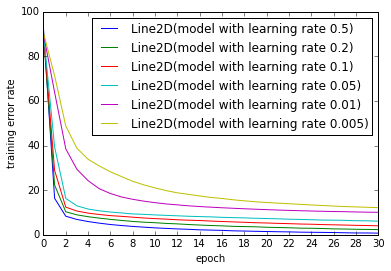

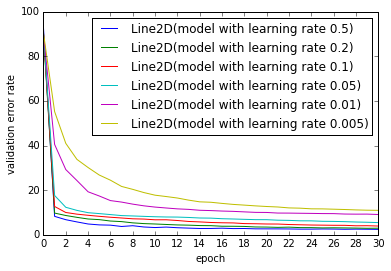

  learning rate     error rate
            0.5           2.38
            0.2           3.25
            0.1            4.3
           0.05           6.08
           0.01            9.3
          0.005          11.23


In [9]:
#3b part 3 - plotting
%matplotlib inline
import matplotlib.pyplot as plt

def plot_epoch_dynamic(values_list, labels, y_label, loc = 1):
    lines = []
    for label, values in zip(labels, values_list):
        line, = plt.plot(values, label=label)
        lines.append(line)
        
    num_epoches = len(values_list[0])
    plt.xlabel("epoch")
    plt.xticks(range(0, num_epoches, 2))
    plt.ylabel(y_label)
    plt.legend(lines, loc=loc)
    
def plot_error_rate(tr_accrs, vd_accrs, labels):
    plt.figure(1)
    plot_epoch_dynamic([(1 - ta) * 100 for ta in tr_accrs], labels, "training error rate")
    plt.figure(2)
    plot_epoch_dynamic([(1 - va) * 100 for va in vd_accrs], labels, "validation error rate")
    plt.show()
    
def print_test_error_rate(test_accrs, learning_rates):
    row_format ="{:>15}" * 2
    header = row_format.format("learning rate", "error rate")
    table = "\n".join([ row_format.format(lr, (1 - test_accr) * 100)\
                       for lr, test_accr in zip(learning_rates, test_accrs)])
    print header
    print table
    
#unboxing
tr_accrs_3b = get_train_accuracies(models_statistics_3b)
vd_accrs_3b = get_valid_accuracies(models_statistics_3b)
test_accrs_3b = [test_stat[1] for test_stat in test_statistics_3b] 

#plotting
labels_3b = [label_3b.format(lr) for lr in learning_rates_3b]
plot_error_rate(tr_accrs_3b, vd_accrs_3b, labels_3b)
print_test_error_rate(test_accrs_3b, learning_rates_3b)


**(b)** (10%) Investigate the impact of different learning rates $\eta \in \{0.5, 0.2, 0.1, 0.05, 0.01, 0.005\}$ on the convergence of the network training as well as the final accuracy:
   * Plot (on a single graph) the error rate curves for each learning rate as a function of training epochs for training set
   * Plot (on another single graph) the error rate curves as a function of training epochs for validation set
   * Include a table of the corresponding error rates for test set

The notebook command `%matplotlib inline` ensures that your graphs will be added to the notebook, rather than opened as additional windows.

**(c)** (10%) Plot the following graphs:
  * Display the 784-element weight vector of each of the 100 hidden units as 10x10 grid plot of 28x28 images, in order to visualise what features of the input they are encoding.  To do this, take the weight vector of each hidden unit, reshape to 28x28, and plot using the `imshow` function).
  * Plot a Hinton Diagram of the output layer weight matrix for digits 0 and 1

In [10]:
%matplotlib inline
#c part1 - train model

model_3c = create_tsk3_default_model()
tr_stats_3c, valid_stats_3c = learn(0.5, train_dp,  model_3c)

INFO:root:Initialising valid data provider...
INFO:root:Training started  ...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.366. Accuracy is 9.94%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.365. Accuracy is 9.90%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.572. Accuracy is 83.66%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.288. Accuracy is 91.87%
INFO:mlp.optimisers:Epoch 1: Took 3 seconds. Training speed 17170 pps. Validation speed 67627 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.288. Accuracy is 91.56%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.244. Accuracy is 93.11%
INFO:mlp.optimisers:Epoch 2: Took 3 seconds. Training speed 18509 pps. Validation speed 68416 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.238. Accuracy is 93.08%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.199. Accuracy is 94.41%
INFO:mlp.optimisers:Epoch 3: Took 3 seconds. Training speed 19326 pp

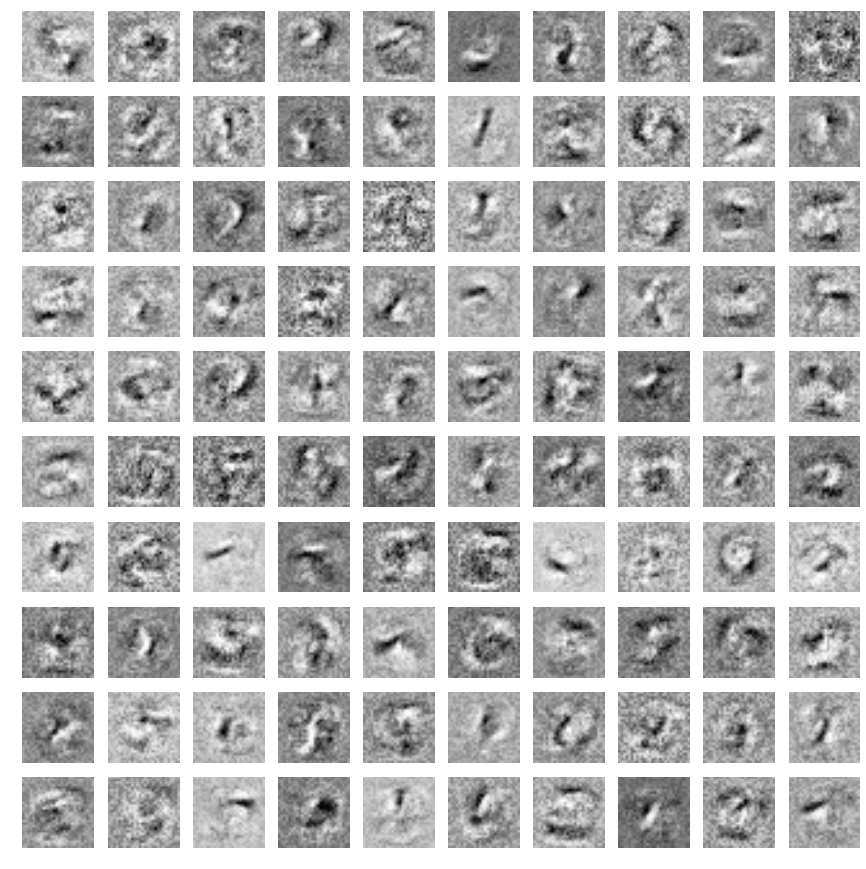

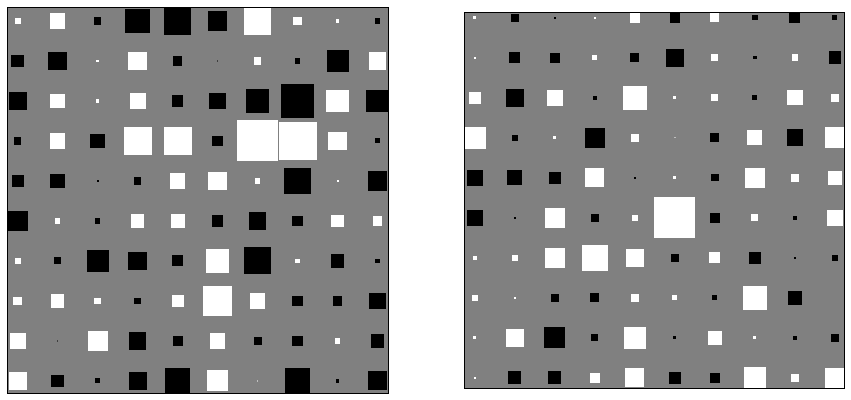

In [12]:
#c part2 - use trained model from c part1 to plot weights
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#the code for hinton is from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
# with my modifications, original didn't work for me well
def hinton(matrix, ax):
    import numpy as np
    import matplotlib.pyplot as plt
    """Draw Hinton diagram for visualizing a weight matrix."""
    #it is different from Hinton diagram code of matlab
    #I just say that max_wegiht value equals to 1 size of the square
    #and all others are between 0 and 1
    max_weight = np.abs(matrix).max()
    
    ax.set_axis_bgcolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x,y),w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.abs(w) / max_weight
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

def show_weight(weight, shape, image_shape, drawer = None):
    def default_drawer(matrix, axar):
        #remove ticks, axes, labels - otherwise too cluttered
        axar.axis('off')
        axar.imshow(matrix, cmap=cm.Greys_r)
    
    drawer = default_drawer if drawer is None else drawer
        
    fig = plt.figure(figsize=(2, 2)) 
    fif, axarr = plt.subplots(*shape, figsize=(15,15))
    axarr_iter = axarr.reshape(shape[0] * shape[1])
    for k, axar in enumerate(axarr_iter):
        drawer(weight[k].reshape(*image_shape), axar)
    plt.show()
    
#weight -> idim x odim
#1 of k encoding for ouptut layer
#so we need to transpose weight and get -> odim x idim
show_weight(model_3c.layers[0].W.T, (10, 10), (28, 28))
show_weight(model_3c.layers[1].W.T, (1, 2), (10, 10), drawer=hinton)

## Task 4 - Experiments with 1-5 hidden layers (30%)

In this task use the learning rate which resulted in the best accuracy in your experiments in Task 3 (b).  Perform the following experiments:

  * Train a similar model to Task 3, with one hidden layer, but with 800 hidden units. 
  * Train 4 additional models with 2, 3, 4 and 5 hidden layers.  Set the number of hidden units for each model, such that all the models have similar number of trainable weights ($\pm$2%).   For simplicity, for a given model, keep the number of units in each hidden layer the same.
  * Plot value of the error function for training and validation sets as a function of training epochs for each model
  * Plot the test set classification accuracy as a function of the number of hidden layers


In [13]:
#task 4 part0 - count number of hidden units for each model

#number of input units, number of output units, number of total weights, number of hidden layers
def count_num_hidden_units(n_in_uts, n_out_uts, n_total_whts, n_hlrs):
    a = float(n_hlrs - 1)
    b = float(n_in_uts + n_out_uts + n_hlrs)
    c = float(n_out_uts - n_total_whts)
    answer = None
    if n_hlrs == 1:
        return int(-c/b)

    opd = (b * b - 4 * a * c)**0.5
    #only x1 because min_point = -b/2a and b/a always > 0 so always min_point < 0
    x1 = (-b + opd) / (2 * a)
    return x1

def count_total_num_weights(n_in_uts, n_out_uts, n_whts_per_hlrs, n_hlrs):
    a = float(n_hlrs - 1)
    b = float(n_in_uts + n_out_uts + n_hlrs)
    c = float(n_out_uts)
    return  n_whts_per_hlrs * n_whts_per_hlrs * a + n_whts_per_hlrs * b + c

total_weights_lr1 = count_total_num_weights(784, 10, 800, 1)
print "total number of wheights {0}".format(total_weights_lr1)
n_whts_per_1_hlrs = count_num_hidden_units(784, 10, total_weights_lr1, 1)
print "number of units per hidden layer for 1 hidden layers model: {0}".format(n_whts_per_1_hlrs)
for n_hlrs in range(2, 6):
    n_whts_per_hlrs = int(count_num_hidden_units(784, 10, total_weights_lr1, n_hlrs))
    print "number of units per hidden layer for {0} hidden layers model: {1}".format(n_hlrs, n_whts_per_hlrs)
    print "check {0} ~ {1}".format(count_total_num_weights(784, 10, n_whts_per_hlrs, n_hlrs), total_weights_lr1)

total number of wheights 636010.0
number of units per hidden layer for 1 hidden layers model: 800
number of units per hidden layer for 2 hidden layers model: 493
check 635487.0 ~ 636010.0
number of units per hidden layer for 3 hidden layers model: 398
check 634024.0 ~ 636010.0
number of units per hidden layer for 4 hidden layers model: 346
check 635266.0 ~ 636010.0
number of units per hidden layer for 5 hidden layers model: 311
check 635383.0 ~ 636010.0


In [14]:
#task 4 part1 - computate statistics before plotting

def create_model_tsk4(n_hlrs, total_weights):
    n_whts_per_hlrs = int(count_num_hidden_units(784, 10, total_weights, n_hlrs))
    cost = CECost()
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=n_whts_per_hlrs, rng=rng))
    for hlr in range(1, n_hlrs):
        model.add_layer(Sigmoid(idim=n_whts_per_hlrs, odim=n_whts_per_hlrs, rng=rng))
    model.add_layer(Softmax(idim=n_whts_per_hlrs, odim=10, rng=rng)) 
    return model

total_weights_tsk4 = count_total_num_weights(784, 10, 800, 1)
models_tsk4 = [create_model_tsk4(n_hlrs, total_weights_tsk4) for n_hlrs in range(1, 6)]
for n, model in enumerate(models_tsk4):
    print "model {0}".format(n + 1)
    print "total number of layers {0}".format(len(model.layers))
    print " ".join(str(layer.W.shape) for layer in model.layers)
    print " "
    
labels_tsk4 = ["{0} hidden layers".format(n_hlrs) for n_hlrs in range(1, 6)]
print labels_tsk4
tasks_tsk4 = [(0.5, model, label) for model, label in zip(models_tsk4, labels_tsk4)]
models_statistics_tsk4 = get_models_statistics(train_dp, tasks_tsk4)
test_statistics_tsk4 = [validate(model, label) for lr, model, label in tasks_tsk4]

INFO:root:Initialising valid data provider...
INFO:root:Training started 1 hidden layers ...
INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.767. Accuracy is 9.98%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.777. Accuracy is 9.61%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.794. Accuracy is 83.84%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.309. Accuracy is 90.76%
INFO:mlp.optimisers:Epoch 1: Took 22 seconds. Training speed 2375 pps. Validation speed 7783 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.297. Accuracy is 91.17%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.248. Accuracy is 92.81%
INFO:mlp.optimisers:Epoch 2: Took 22 seconds. Training speed 2322 pps. Validation speed 10609 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 0.248. Accuracy is 92.70%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 0.217. Accuracy is 93.86%
INFO:mlp.optimisers:Epoch 3: Took 23 seconds. Training

model 1
total number of layers 2
(784, 800) (800, 10)
 
model 2
total number of layers 3
(784, 493) (493, 493) (493, 10)
 
model 3
total number of layers 4
(784, 398) (398, 398) (398, 398) (398, 10)
 
model 4
total number of layers 5
(784, 346) (346, 346) (346, 346) (346, 346) (346, 10)
 
model 5
total number of layers 6
(784, 311) (311, 311) (311, 311) (311, 311) (311, 311) (311, 10)
 
['1 hidden layers', '2 hidden layers', '3 hidden layers', '4 hidden layers', '5 hidden layers']


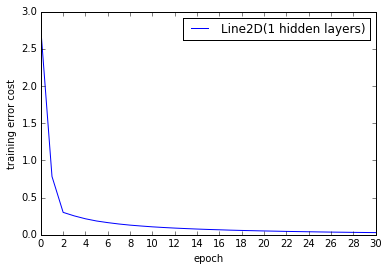

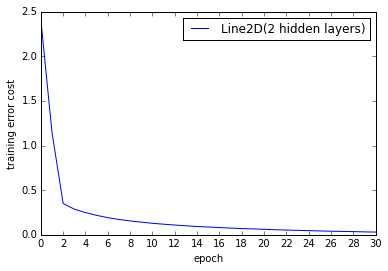

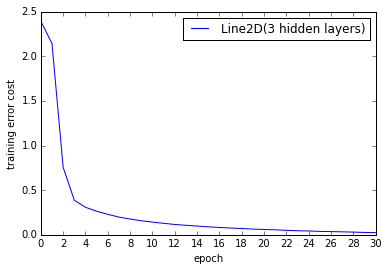

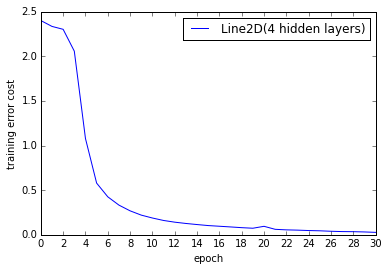

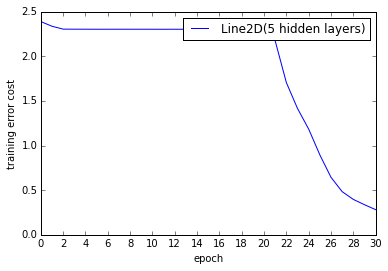

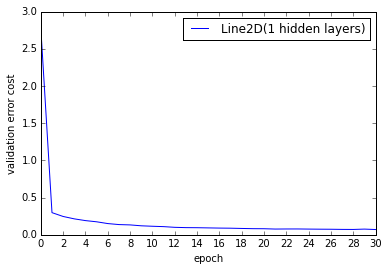

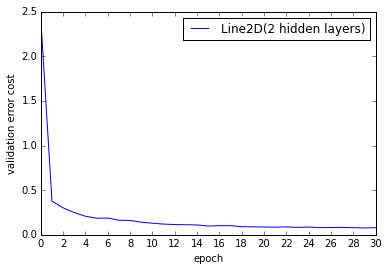

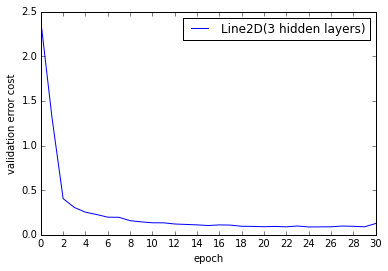

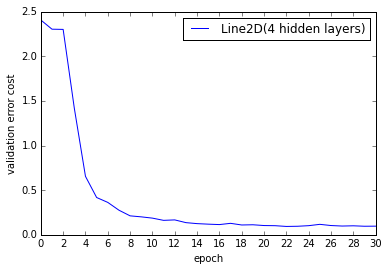

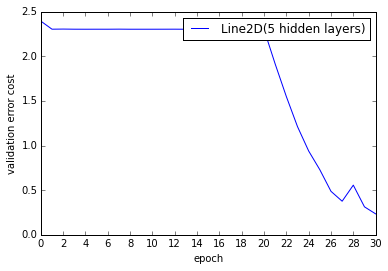

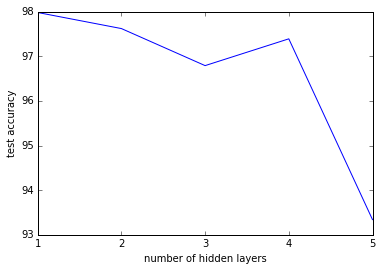

In [116]:
#task 4 part 2 - plotting
#the work is done by Ruslan Burakov, s1569105
%matplotlib inline
import matplotlib.pyplot as plt

def plot_test_accrs(test_accrs, hidden_lrs):
    plt.figure()
    plt.plot(hidden_lrs, test_accrs)
    plt.xlabel("number of hidden layers")
    plt.xticks(hidden_lrs)
    plt.ylabel("test accuracy")
    
def plot_error_cost(error_costs, labels, name):    
    for label, error_cost in zip(labels, error_costs):
        plt.figure()
        plot_epoch_dynamic([error_cost], [label], name, loc = 1)
    
#Plot the test set classification accuracy as a function of the number of hidden layers       
#unboxing
tr_error_costs_tsk4 = get_train_error_costs(models_statistics_tsk4)
vd_error_costs_tsk4 = get_valid_error_costs(models_statistics_tsk4)
test_accrs_tsk4 = [test_stat[1] for test_stat in test_statistics_tsk4] 

#plotting
plot_error_cost(tr_error_costs_tsk4, labels_tsk4, "training error cost")
plot_error_cost(vd_error_costs_tsk4, labels_tsk4, "validation error cost")
plot_test_accrs([test_accrs * 100.0 for test_accrs in test_accrs_tsk4], range(1, 5 + 1))
plt.show()

This is the end of coursework 1.

Please remember to save your notebook, and submit your notebook following the instructions at the top.  Please make sure that you have executed all the code cells when you submit the notebook.
